### Quick tutorial on lambda functions

- lambda is a keyword in Python
- it is a short-hand substitute for a function
- useful for:
    - one-off function you'll never use again in the program
    - passing a function as an argument to another function
    

- syntax:
    - lambda arguments: expression

In [1]:
# function
def double_fun(x):
    return x * 2

In [2]:
# lambda
double = lambda x: x * 2

In [3]:
double_fun(3)

6

In [4]:
double(3)

6

Both give the same value as they perform the same operations. The lambda function is only one line though and can be assigned to a variable, here "double".

## Analayzing hospital data for patient no-shows

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
df = pd.read_csv('no_show_patient_data.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Step 1. Clean the data

In [7]:
## PatientId and AppointmentID unnecessary so we can drop them
df.drop(['PatientId', 'AppointmentID'], axis=1, inplace=True)

In [8]:
df['ScheduledDay'].dtype, df['AppointmentDay'].dtype

(dtype('O'), dtype('O'))

We see the data types of the date columns are both object
Want to convert these to datetime objects to make it easier to work with later

In [9]:
df['ScheduledDay'] = pd.to_datetime(df['ScheduledDay'])
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay'])

In [10]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

Replace the yes and no with 1 and 0, respectively, so we can do analysis more easily later.

In [11]:
df['No-show'] = df['No-show'].apply(lambda x: x == 'Yes' and 1 or 0)

Above is a use of the lambda function which we went through in the beginning.

The lambda function:
- Takes an argument x
- Checks whether x equals "Yes"
- Then the rest of the function executes (and 1 or 0)
- If x equals "Yes" then it returns True, then the function becomes (True and 1 or 0)
    - True and 1 --> gives you 1
    - False and 1 --> returns False, so the or executes which gives you 0

In [12]:
df.isnull().sum()

Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

We see no null values so we don't have to be concerned with fixing any missing values

In [13]:
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


After a quick glance at the data, all the columns looked reasonably formatted.

### Step 2. Visualizing the data

In [14]:
df.shape

(110527, 12)

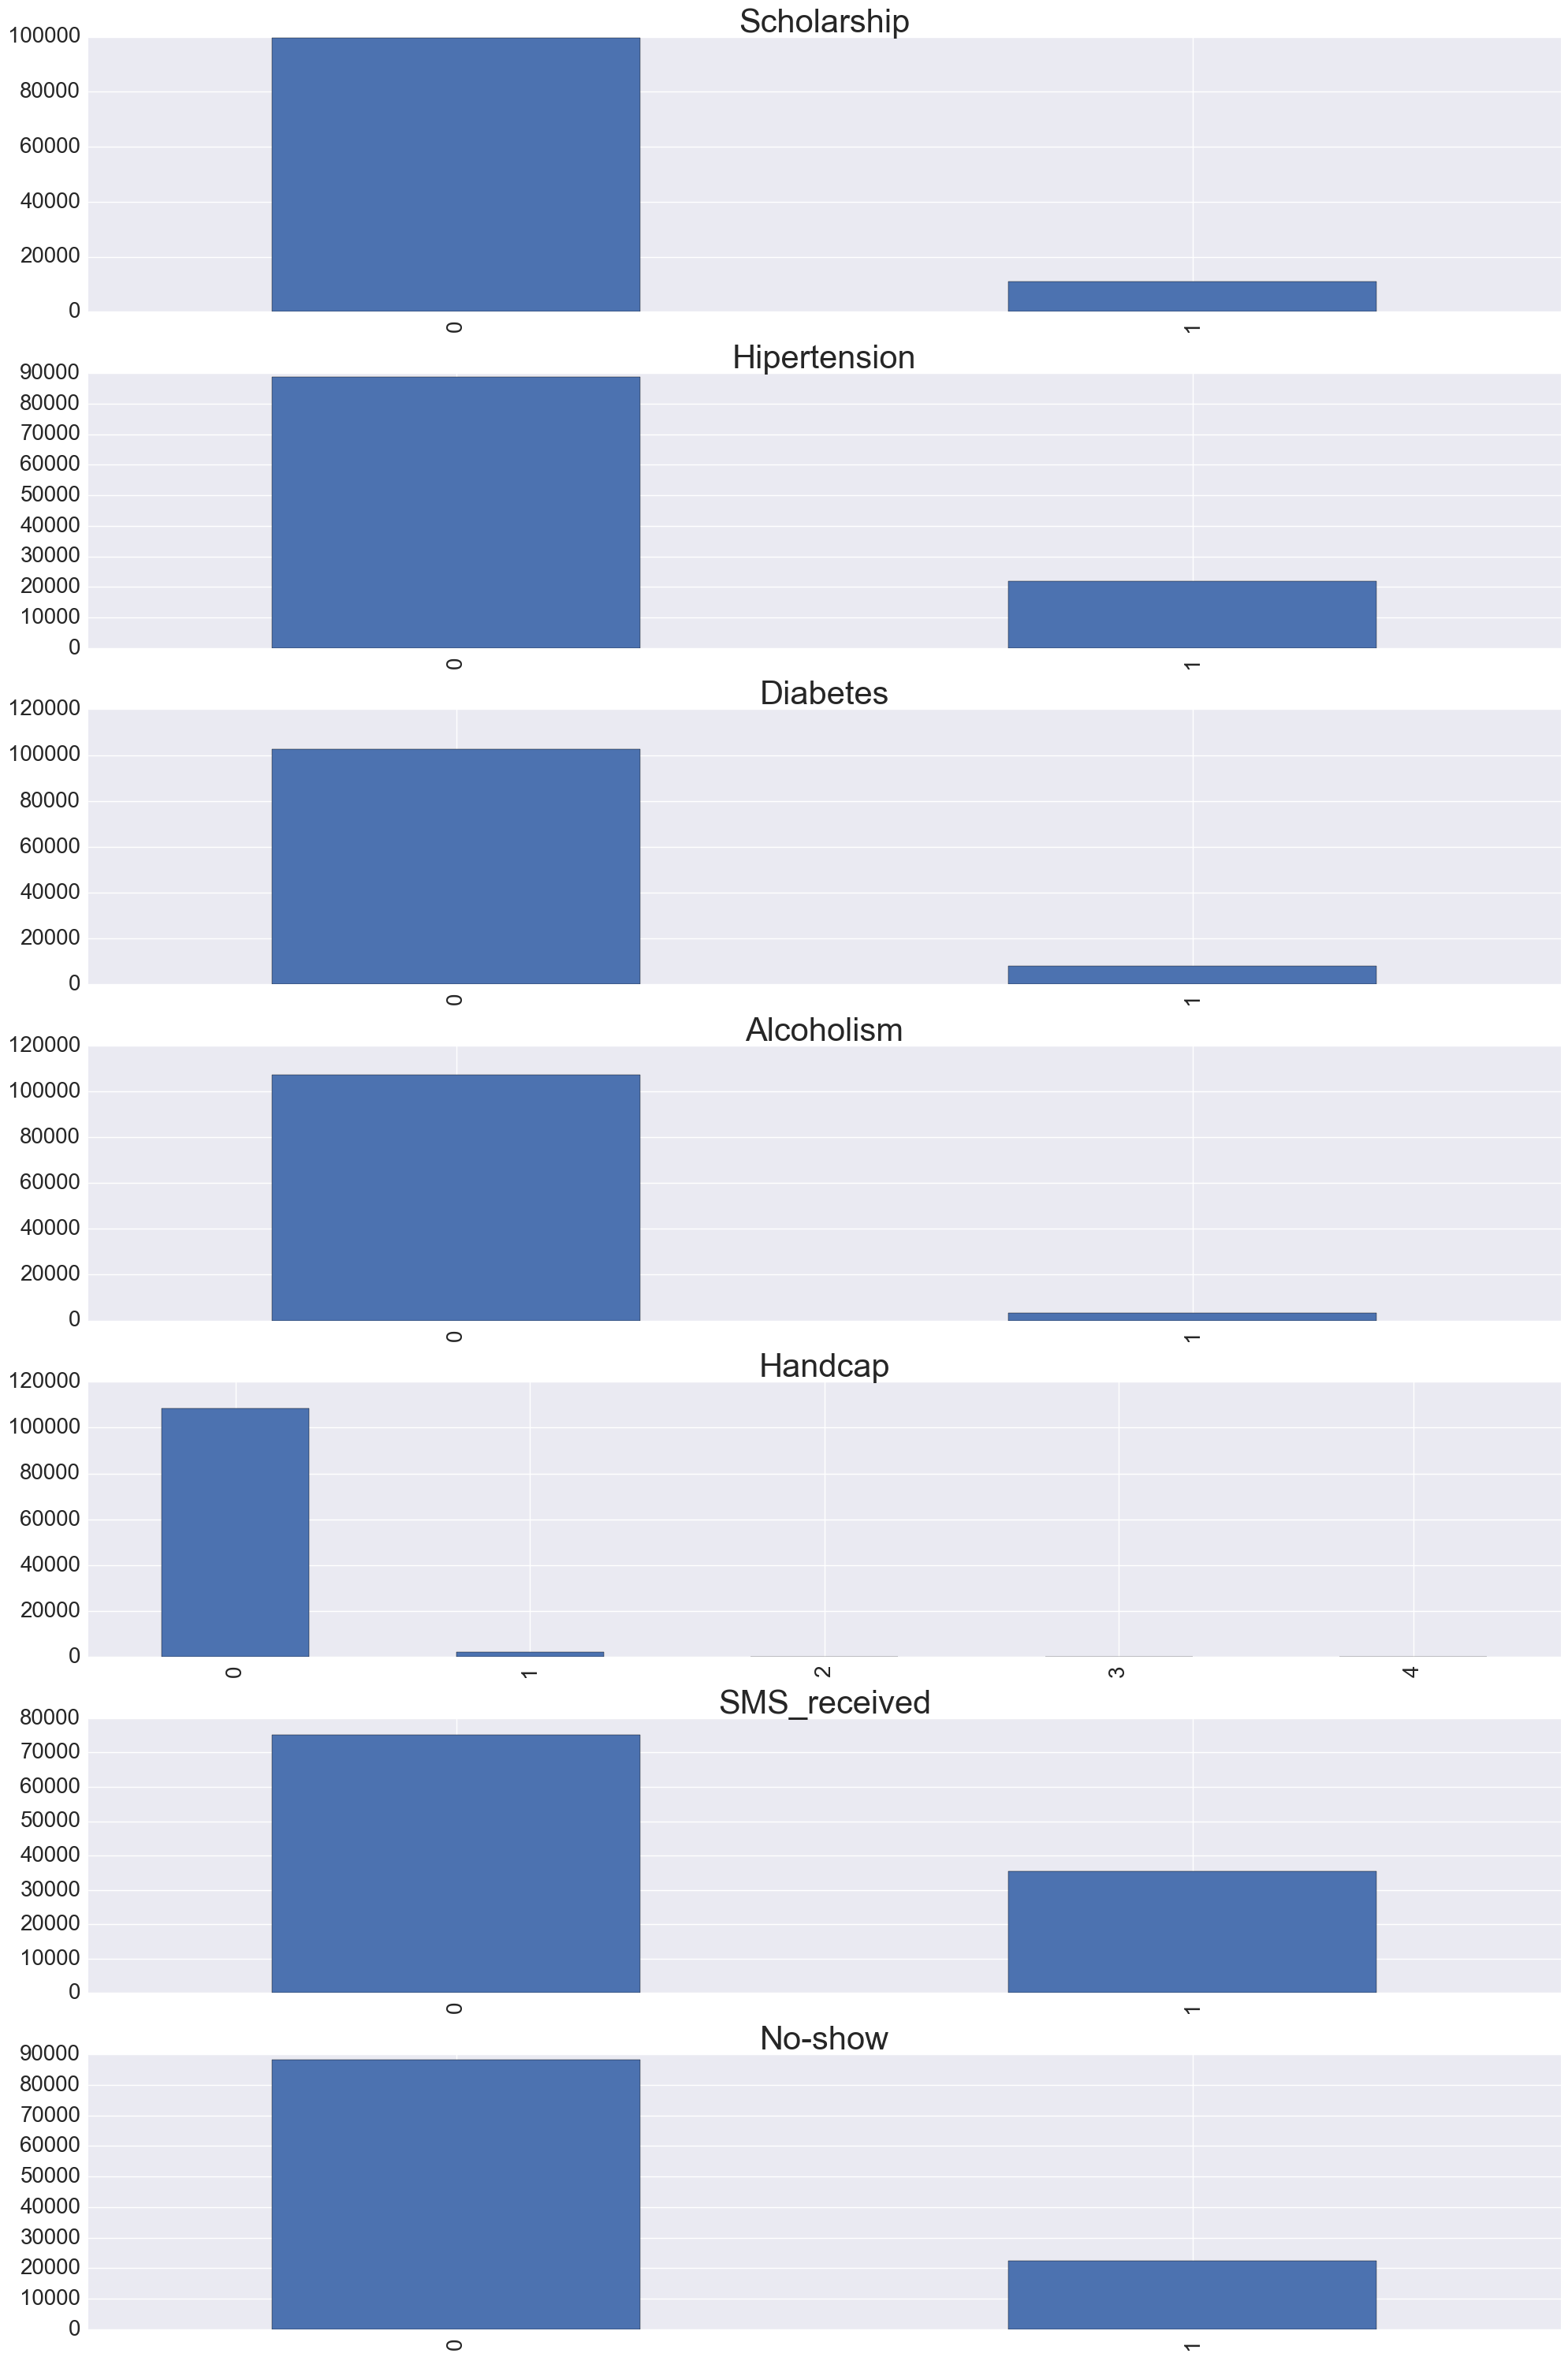

In [63]:
cols = ['Scholarship', 'Hipertension', 'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show']
fig, ax = plt.subplots(7, figsize=(20, 30))

for i, col in enumerate(cols):
    df[col].value_counts().plot(kind='bar', subplots=True, ax=ax[i])
    ax[i].set_title(col,fontsize= 30)
    ax[i].tick_params(labelsize=20)
    
plt.tight_layout()

In [65]:
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64